In [2]:
import numpy as np
import sys
sys.path.append('..')
from utils.util import *
import matplotlib.pyplot as plt
import warnings
# warnings.simplefilter('error', UserWarning)
warnings.simplefilter("default")
# start 6 at 10:50, 5 steps 11:07 - 1:03 stape 2 run 7
import seaborn as sns
sns.reset_defaults()
sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
# sns.set_context("paper")
sns.set_context("talk")


/opt/anaconda3/envs/csls/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Steps for the analysis

#### 1. Group based on the congeuncy and fill out the missing values by nan

#### 2. Then for each run, for each congeuncy group:
##### 2.1. Remove any outliers (those that very big and very small): abs(data)>1
##### 2.2. Do an interpolation on the rest of the data to replace nans

#### 3. Average over all the runs 

#### 4. Plot each congeuncy group 

In [3]:
args_dict = {}
args_dict['analyze_names'] = ['calc_ratio']
args_dict = set_args_dict(args_dict)
model_str = 'RNN'

## Read the results

In [4]:
analyze_name = args_dict['analyze_names'][0]

# ----------------------
ctx_order = 'first'
ctx_order_str = 'ctxF'
# ----------------------
with open('../../results/%s_results_rnn_sbs_e1_temp.P' %(ctx_order_str), 'rb') as f:
    ctxF_results_rnn_sbs = pickle.load(f)

ctxF_results_rnn_sbs['Cortical'].keys()

dict_keys(['loss', 'train_acc', 'test_acc', 'analyze_acc', 'analyze_correct', 'analysis', 'cortical_runs_sbs'])

In [11]:
cortical_runs_sbs = ctxF_results_rnn_sbs['Cortical']['cortical_runs_sbs']
cortical_runs_sbs

KeyboardInterrupt: 

In [22]:
results = cortical_runs_sbs
results = np.asarray(results)
# results[0][0]['dist_result_a']


In [24]:
results = np.asarray(results)
n_runs, n_checkpoints = results.shape
print(n_runs, n_checkpoints)

2 1001


In [27]:
runs = {}
for r in range(n_runs):
    checkpoints = {}
    for cp in range(n_checkpoints):
        for k, v in results[r][cp].items():
            if cp == 0:
                checkpoints[k] = [v]
            else:
                checkpoints[k].append(v)
    for k, v in checkpoints.items():
        if r == 0:
            runs[k] = [[] for i in range(n_runs)]
            
        runs[k][r] = v

In [29]:
runs['dist_result_a'].shape

AttributeError: 'list' object has no attribute 'shape'

In [113]:
labels = ['cong', 'incong','ties']
model_str = 'RNN'
mfig_str = 'RNN'
step_every = 1

<string>:6: UserWarning: Warning: converting a masked element to nan.
/opt/anaconda3/envs/csls/lib/python3.6/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/csls/lib/python3.6/site-packages/matplotlib/ticker.py:586: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


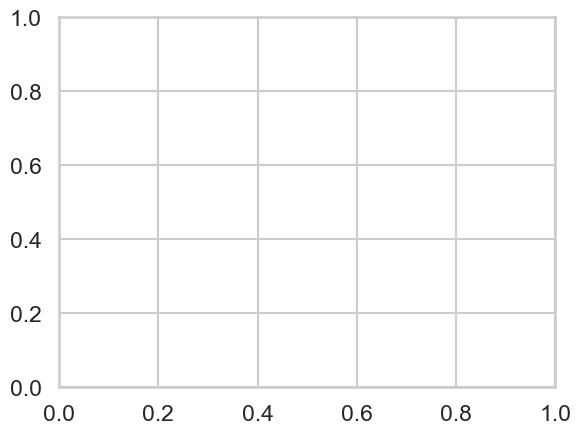

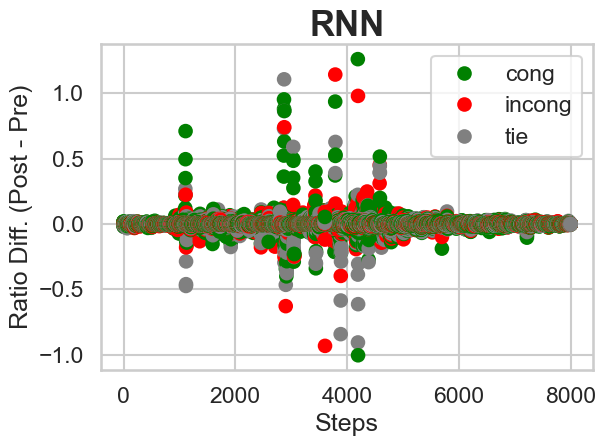

In [114]:
# This plots all of the points at the same time, so cannot filter out ties from it
# Which will be the next plot 
# cannot do something like rd = rd[rd[:,1]!=0] since it would change the x-axis

from matplotlib.colors import ListedColormap

plt.figure()
plt.cla()
fig, ax = plt.subplots()
colours = ListedColormap(['green','red','gray'])
labels = ['cong', 'incong', 'tie']

for r in range(runs):
        rd = ratio_diffs[r, :, :]
        xs = np.arange(checkpoints)
        scatter = ax.scatter(xs, rd[:,0], c=rd[:,1], cmap=colours)
        ax.legend(handles=scatter.legend_elements()[0], labels=labels)
        # ax.set_ylim([-0.1,0.1])


plt.title('%s' %(model_str), fontweight='bold', fontsize='25')
# plt.legend(labels=labels)
plt.xlabel('Steps')
plt.ylabel('Ratio Diff. (Post - Pre)')
plt.tight_layout()
plt.show()

savefig_str = 'stepbystep_every%s_run%s_scatter_allruns' %(step_every, runs)

fig_str = '%s_%s_%s_hidds' %(ctx_order_str, savefig_str, mfig_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
        bbox_inches = 'tight', pad_inches = 0)

In [115]:
savefig_str

'stepbystep_every1_run20_scatter_allruns'

<string>:6: UserWarning: Warning: converting a masked element to nan.
/opt/anaconda3/envs/csls/lib/python3.6/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/csls/lib/python3.6/site-packages/matplotlib/ticker.py:586: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


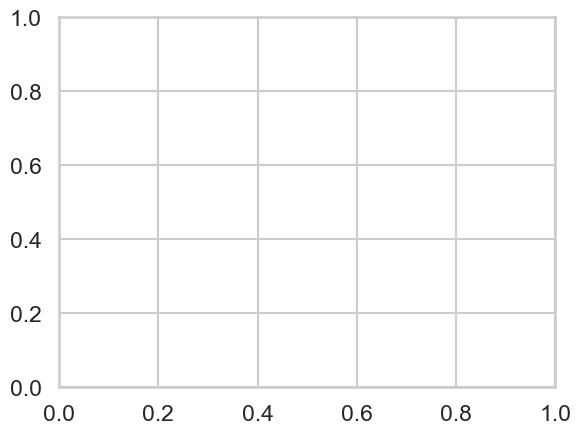

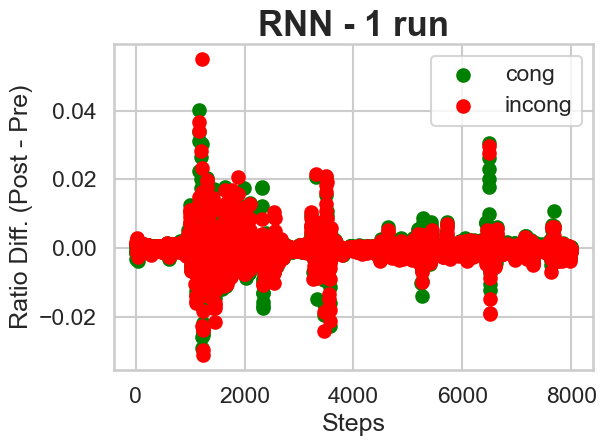

In [116]:
# This plot first filtered out and grouped them based on the congruency 
# Then to make the x-axis size the same as the checkpoints, add nan to the data
# Then only plot for one run here since it was super messy and crowded only to look at the scatter 
# Also, another issue for all the runs: there are some very big or very small numbers

plt.cla()
fig, ax = plt.subplots()

colours = ListedColormap(['green','red','gray'])
labels = ['cong', 'incong']
# 1: congruent, -1:incongruent, 0:none/ties

# for r in range(runs)
for r in range(1):
        rd  = ratio_diffs[r, :, :]
        
        cs   = [val if rd[ind,1]==1 else np.nan for ind, val in enumerate(rd[:,0])]
        incs = [val if rd[ind,1]==-1 else np.nan for ind, val in enumerate(rd[:,0])]
        ts   = [val if rd[ind,1]==0 else np.nan for ind, val in enumerate(rd[:,0])]
        
        cs = np.asarray(cs)
        incs = np.asarray(incs)
        ts = np.asarray(ts)

        mask1 = np.isfinite(cs)
        mask2 = np.isfinite(incs)
        mask3 = np.isfinite(ts)
        
        xs = np.arange(checkpoints)
        
        scatter1 = ax.scatter(xs[mask1], cs[mask1], c='green')
        scatter2 = ax.scatter(xs[mask2], incs[mask2], c='red')
        # scatter3 = ax.scatter(xs, ts, c='gray')
        
        # add lines
        # ax.plot(xs[mask3], ts[mask3])#, linestyle='-', marker='o')
        
        # UserWarning: Warning: converting a masked element to nan.
        ax.legend(handles=scatter.legend_elements()[0], labels=labels)

plt.title('%s - 1 run' %(model_str), fontweight='bold', fontsize='25')
plt.legend(labels=labels)
plt.xlabel('Steps')
plt.ylabel('Ratio Diff. (Post - Pre)')
plt.tight_layout()
plt.show()

savefig_str = 'stepbystep_every%s_run%s_scatter_1run' %(step_every, runs)
fig_str = '%s_%s_%s_hidds' %(ctx_order_str, savefig_str, mfig_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
        bbox_inches = 'tight', pad_inches = 0)
        

In [117]:
# for each congruency group, make a 2D matrix with the shape [runs, checkpoints]
# where all the missing values are nan
# one idea could be do the interpolation on the matrix instead of for ecah run separately
# I didn't do the interpolation, since interp2D and other functions I briefly looked 
# consider the matrix as a grid, so each point is different with the others
# However, I wanted it to interpolate each point by both looking at the all rows for that column 
# which gives all the info for all the runs, and looking at the columns for that row, to look at other
# checkpoints or maybe just nearby checkpoints, but I couldn't find a function for this 
# so I ended up using 1D interpolation


# css  = np.empty(shape=[runs, checkpoints])
# incs = np.empty(shape=[runs, checkpoints])
# tss  = np.empty(shape=[runs, checkpoints])

# css[:], incs[:], tss[:] = np.NaN, np.NaN, np.NaN

# for r in range(runs):
#     for cp in range(checkpoints):
#         if ratio_diffs[r, cp, 1] == 1:
#             css[r,cp] = ratio_diffs[r, cp, 0]
#         elif ratio_diffs[r, cp, 1] == -1:
#             incs[r,cp] = ratio_diffs[r, cp, 0]
#         elif ratio_diffs[r, cp, 1] == 0:
#             tss[r,cp] = ratio_diffs[r, cp, 0]



In [129]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [130]:
# import numpy as np
# from scipy import interpolate

def interp_func(A):
    '''
    interpolate to fill nan values
    '''
    nans, x = nan_helper(A)
    B = A.copy()
    B[nans]= np.interp(x(nans), x(~nans), A[~nans])
    # inds = np.arange(A.shape[0])
    # good = np.where(np.isfinite(A))
    # f = interpolate.interp1d(inds[good], A[good],bounds_error=False)
    # B = np.where(np.isfinite(A),A,f(inds))
    return B

In [138]:
# outliers can be between the 2 SD from the mean but it didn't result in a way I wanted
# since the mean would be affected by those very big and small numbers (why I used median)
# so for now I replaced the data with nan if the abs value is bigger than 1 

def nan_outliers(data, m=2):
    # outliers = abs(data - np.median(data)) < m * np.std(data)
    # for the nan it would show a warning:RuntimeWarning: invalid value encountered in greater
    outliers = abs(data)>0.1
    if len(np.where(outliers==True)[0])>0:
        print('data of the outlier(s):', data[outliers])
        print(len(outliers))
    data[outliers] = np.NaN
    return data
    

In [139]:
css   = np.empty(shape=[runs, checkpoints])
incss = np.empty(shape=[runs, checkpoints])
tss   = np.empty(shape=[runs, checkpoints])

for r in range(runs):
    # take the cong data, and do the interpolation for each run seaprately
    rd  = ratio_diffs[r, :, :]
    ids = [int(rd[i,1]) for i in range(checkpoints)]
    cs   = [val if rd[ind,1]==1 else np.nan for ind, val in enumerate(rd[:,0])]
    incs = [val if rd[ind,1]==-1 else np.nan for ind, val in enumerate(rd[:,0])]
    ts   = [val if rd[ind,1]==0 else np.nan for ind, val in enumerate(rd[:,0])]
    
    cs   = [val if rd[ind,1]==1 else np.nan for ind, val in enumerate(rd[:,0])]
    incs = [val if rd[ind,1]==-1 else np.nan for ind, val in enumerate(rd[:,0])]
    ts   = [val if rd[ind,1]==0 else np.nan for ind, val in enumerate(rd[:,0])]
    
    cs   = np.asarray(cs)
    incs = np.asarray(incs)
    ts   = np.asarray(ts)

    # cs = nan_outliers(cs)
    # incs = nan_outliers(incs)
    # ts = nan_outliers(ts)

    cs_interp   = interp_func(cs)
    incs_interp = interp_func(incs)
    ts_interp   = interp_func(ts)

    css[r,:]   = cs_interp
    incss[r,:] = incs_interp
    tss[r,:]   = ts_interp
    

In [140]:
# take avg over all the runs 
cs_avg = np.mean(css,axis=0)
incs_avg = np.mean(incss,axis=0)
ts_avg = np.mean(tss,axis=0)

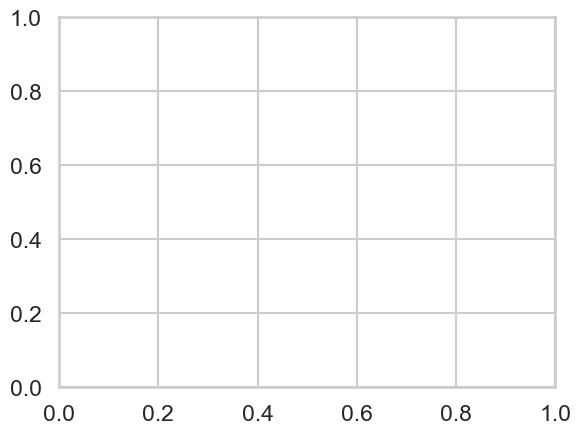

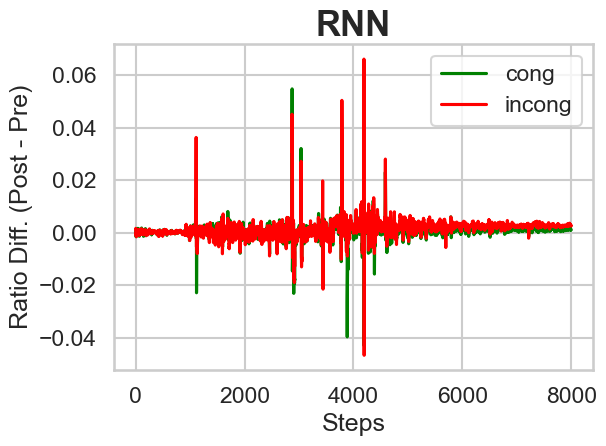

In [141]:
# labels = ['cong', 'incong','ties']
labels = ['cong', 'incong']
plt.cla()
fig, ax = plt.subplots()
plt.plot(cs_avg, color='green')
plt.plot(incs_avg, color='red')
# plt.plot(ts_avg, color='gray')

plt.title('%s' %(model_str), fontweight='bold', fontsize='25')
plt.legend(labels=labels)
plt.xlabel('Steps')
plt.ylabel('Ratio Diff. (Post - Pre)')
plt.tight_layout()
plt.show()

savefig_str = 'stepbystep_every%s_run%s_intrp_noTies' %(step_every, runs)
fig_str = '%s_%s_%s_hidds' %(ctx_order_str, savefig_str, mfig_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
        bbox_inches = 'tight', pad_inches = 0)

In [61]:
# do we need to even smooth more?